# **Case Study #2: Experimenting with transfer learning**

Set device to GPU if available:

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


1. Finetuning: this is the same setup as we did in experiment 8, where the goal is to
update all the pretrained weights besides the newly added classification layer.

## Load CIFAR10 Dataset and Set Device

Load CIFAR10 images and apply transforms to match input size for pretrained models.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
# Set device to GPU if available, else use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Resize to 256, crop center to 224, convert to tensor, normalize using ImageNet stats
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

batch_size = 32
# Load CIFAR10 training dataset with transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
# Load CIFAR10 test dataset with same transforms
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


100%|██████████| 170M/170M [00:04<00:00, 35.7MB/s]


## Training and Evaluation Function

Define a function to train the model for 3 epochs and calculate accuracy on the test set.


In [3]:
# Define training and evaluation function
def train_and_evaluate(model, model_name):
    model = model.to(device)
        # Set loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    # Training loop for 3 epochs
    model.train()
    for epoch in range(3):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero gradients, forward pass, compute loss, backpropagation, update weights
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Track loss and print every 200 batches
            running_loss += loss.item()
            if i % 200 == 199:
                print(f'[{model_name} | Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
                running_loss = 0.0

    print(f'{model_name} Finished Training')
    # Evaluation on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    # Print accuracy
    print(f'{model_name} Accuracy on test images: {100 * correct / total:.2f}%\n')


## Finetuning AlexNet

Load pretrained AlexNet, replace the last layer to match CIFAR10 classes, and train the full model.


In [ ]:
# Load pretrained AlexNet model
alexnet = models.alexnet(weights='IMAGENET1K_V1')
# Replace the last fully connected layer with a new one for 10 classes
alexnet.classifier[6] = nn.Linear(4096, 10)
# Train and evaluate the model using finetuning setup
train_and_evaluate(alexnet, 'AlexNet')


[AlexNet | Epoch 1, Batch 200] loss: 0.981
[AlexNet | Epoch 1, Batch 400] loss: 0.718
[AlexNet | Epoch 1, Batch 600] loss: 0.634
[AlexNet | Epoch 1, Batch 800] loss: 0.598
[AlexNet | Epoch 1, Batch 1000] loss: 0.544
[AlexNet | Epoch 1, Batch 1200] loss: 0.546
[AlexNet | Epoch 1, Batch 1400] loss: 0.498
[AlexNet | Epoch 2, Batch 200] loss: 0.398
[AlexNet | Epoch 2, Batch 400] loss: 0.412
[AlexNet | Epoch 2, Batch 600] loss: 0.411
[AlexNet | Epoch 2, Batch 800] loss: 0.384
[AlexNet | Epoch 2, Batch 1000] loss: 0.404
[AlexNet | Epoch 2, Batch 1200] loss: 0.371
[AlexNet | Epoch 2, Batch 1400] loss: 0.386
[AlexNet | Epoch 3, Batch 200] loss: 0.305
[AlexNet | Epoch 3, Batch 400] loss: 0.300
[AlexNet | Epoch 3, Batch 600] loss: 0.321
[AlexNet | Epoch 3, Batch 800] loss: 0.316
[AlexNet | Epoch 3, Batch 1000] loss: 0.288
[AlexNet | Epoch 3, Batch 1200] loss: 0.304
[AlexNet | Epoch 3, Batch 1400] loss: 0.309
AlexNet Finished Training
AlexNet Accuracy on test images: 88.27%



## Finetuning VGG16

Load pretrained VGG16, modify the final layer for CIFAR10 classification, and train the full model.


In [ ]:
# Load pretrained VGG16 model
vgg16 = models.vgg16(weights='IMAGENET1K_V1')
# Replace the last fully connected layer with a new one for 10 classes
vgg16.classifier[6] = nn.Linear(4096, 10)
# Train and evaluate the model using finetuning setup
train_and_evaluate(vgg16, 'VGG16')


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 76.4MB/s]


[VGG16 | Epoch 1, Batch 200] loss: 0.886
[VGG16 | Epoch 1, Batch 400] loss: 0.547
[VGG16 | Epoch 1, Batch 600] loss: 0.477
[VGG16 | Epoch 1, Batch 800] loss: 0.423
[VGG16 | Epoch 1, Batch 1000] loss: 0.393
[VGG16 | Epoch 1, Batch 1200] loss: 0.364
[VGG16 | Epoch 1, Batch 1400] loss: 0.350
[VGG16 | Epoch 2, Batch 200] loss: 0.236
[VGG16 | Epoch 2, Batch 400] loss: 0.253
[VGG16 | Epoch 2, Batch 600] loss: 0.256
[VGG16 | Epoch 2, Batch 800] loss: 0.241
[VGG16 | Epoch 2, Batch 1000] loss: 0.241
[VGG16 | Epoch 2, Batch 1200] loss: 0.234
[VGG16 | Epoch 2, Batch 1400] loss: 0.241
[VGG16 | Epoch 3, Batch 200] loss: 0.150
[VGG16 | Epoch 3, Batch 400] loss: 0.157
[VGG16 | Epoch 3, Batch 600] loss: 0.168
[VGG16 | Epoch 3, Batch 800] loss: 0.151
[VGG16 | Epoch 3, Batch 1000] loss: 0.175
[VGG16 | Epoch 3, Batch 1200] loss: 0.156
[VGG16 | Epoch 3, Batch 1400] loss: 0.153
VGG16 Finished Training
VGG16 Accuracy on test images: 92.03%



2. ConvNet as fixed feature extractor Here, we freeze the weights for all of the
network except that of the final fully connected layer. This last fully connected
layer is replaced with a new one with random weights and only this layer is
trained.

## Feature Extraction with AlexNet

Freeze all layers except the final classifier layer. Train only the last layer on CIFAR10.


In [4]:
# Load pretrained AlexNet model
alexnet = models.alexnet(weights='IMAGENET1K_V1')
# Freeze all parameters
for param in alexnet.parameters():
    param.requires_grad = False
# Replace the last fully connected layer with a new one for 10 classes
alexnet.classifier[6] = nn.Linear(4096, 10)
# Select only the parameters of the new layer for optimization
params_to_update = alexnet.classifier[6].parameters()

alexnet = alexnet.to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
# Training loop (feature extraction)
alexnet.train()
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[Feature Extractor | Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training (Feature Extractor)')
# Evaluation
alexnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Feature Extractor Accuracy on test images: {100 * correct / total:.2f}%')


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 180MB/s]


[Feature Extractor | Epoch 1, Batch 200] loss: 1.037
[Feature Extractor | Epoch 1, Batch 400] loss: 0.791
[Feature Extractor | Epoch 1, Batch 600] loss: 0.765
[Feature Extractor | Epoch 1, Batch 800] loss: 0.772
[Feature Extractor | Epoch 1, Batch 1000] loss: 0.740
[Feature Extractor | Epoch 1, Batch 1200] loss: 0.768
[Feature Extractor | Epoch 1, Batch 1400] loss: 0.708
[Feature Extractor | Epoch 2, Batch 200] loss: 0.701
[Feature Extractor | Epoch 2, Batch 400] loss: 0.674
[Feature Extractor | Epoch 2, Batch 600] loss: 0.667
[Feature Extractor | Epoch 2, Batch 800] loss: 0.681
[Feature Extractor | Epoch 2, Batch 1000] loss: 0.696
[Feature Extractor | Epoch 2, Batch 1200] loss: 0.658
[Feature Extractor | Epoch 2, Batch 1400] loss: 0.704
[Feature Extractor | Epoch 3, Batch 200] loss: 0.661
[Feature Extractor | Epoch 3, Batch 400] loss: 0.655
[Feature Extractor | Epoch 3, Batch 600] loss: 0.632
[Feature Extractor | Epoch 3, Batch 800] loss: 0.645
[Feature Extractor | Epoch 3, Batch 1000

## Feature Extraction with VGG16

Freeze all layers except the final classifier layer. Train only the last layer on CIFAR10.


In [6]:
# Load pretrained VGG16 model
vgg16 = models.vgg16(weights='IMAGENET1K_V1')
# Freeze all parameters
for param in vgg16.parameters():
    param.requires_grad = False
# Replace the last fully connected layer with a new one for 10 classes
vgg16.classifier[6] = nn.Linear(4096, 10)
# Select only the parameters of the new layer for optimization
params_to_update = vgg16.classifier[6].parameters()
# Move model to device
vgg16 = vgg16.to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
# Training loop (feature extraction)
vgg16.train()
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[VGG16 Feature Extractor | Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training (VGG16 Feature Extractor)')
# Evaluation
vgg16.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'VGG16 Feature Extractor Accuracy on test images: {100 * correct / total:.2f}%')


[VGG16 Feature Extractor | Epoch 1, Batch 200] loss: 1.041
[VGG16 Feature Extractor | Epoch 1, Batch 400] loss: 0.774
[VGG16 Feature Extractor | Epoch 1, Batch 600] loss: 0.721
[VGG16 Feature Extractor | Epoch 1, Batch 800] loss: 0.700
[VGG16 Feature Extractor | Epoch 1, Batch 1000] loss: 0.665
[VGG16 Feature Extractor | Epoch 1, Batch 1200] loss: 0.673
[VGG16 Feature Extractor | Epoch 1, Batch 1400] loss: 0.660
[VGG16 Feature Extractor | Epoch 2, Batch 200] loss: 0.640
[VGG16 Feature Extractor | Epoch 2, Batch 400] loss: 0.620
[VGG16 Feature Extractor | Epoch 2, Batch 600] loss: 0.611
[VGG16 Feature Extractor | Epoch 2, Batch 800] loss: 0.640
[VGG16 Feature Extractor | Epoch 2, Batch 1000] loss: 0.639
[VGG16 Feature Extractor | Epoch 2, Batch 1200] loss: 0.638
[VGG16 Feature Extractor | Epoch 2, Batch 1400] loss: 0.645
[VGG16 Feature Extractor | Epoch 3, Batch 200] loss: 0.623
[VGG16 Feature Extractor | Epoch 3, Batch 400] loss: 0.625
[VGG16 Feature Extractor | Epoch 3, Batch 600] los

Compare the accuracy of the two models on the test set of CIFAR10 dataset using the
two setups mentioned above. Comment on your results and discuss any insights gained
from comparing the two setups.

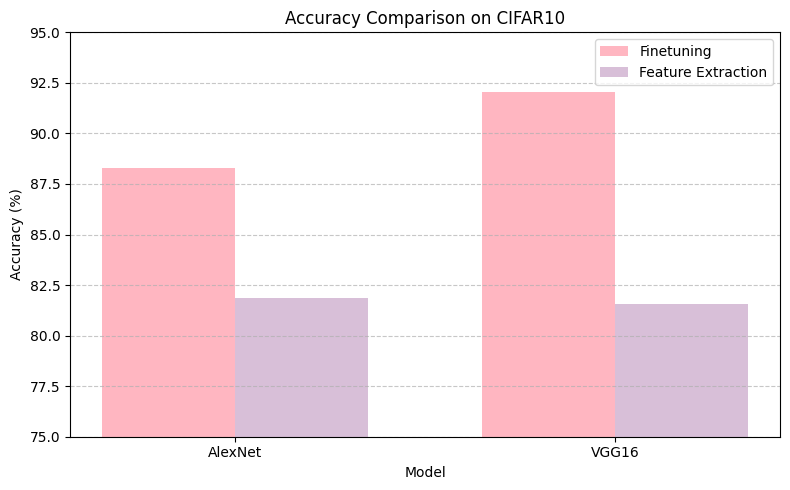

In [7]:
import matplotlib.pyplot as plt
models = ['AlexNet', 'VGG16']
finetune_acc = [88.27, 92.03]
feature_acc = [81.84, 81.58]
bar_width = 0.35
x = range(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, finetune_acc, width=bar_width, label='Finetuning', color='#FFB6C1')
plt.bar([i + bar_width for i in x], feature_acc, width=bar_width, label='Feature Extraction', color='#D8BFD8')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison on CIFAR10')
plt.xticks([i + bar_width / 2 for i in x], models)
plt.ylim(75, 95)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()


I tested AlexNet and VGG16 using two setups: finetuning and feature extraction. The results showed that finetuning gave better accuracy than feature extraction for both models.


| Model   | Finetuning Accuracy | Feature Extraction Accuracy |
|---------|---------------------|------------------------------|
| AlexNet | 88.27%              | 81.84%                       |
| VGG16   | 92.03%              | 81.58%                       |


Finetuning allows the model to update all its weights, including the convolutional layers. This helps the network adapt better to the CIFAR10 dataset, which is different from ImageNet. In contrast, feature extraction keeps most of the weights frozen, so the model relies only on the pretrained features, which may not be optimal for CIFAR10. That’s why the accuracy is lower in this setup.

VGG16 achieved higher accuracy than AlexNet in both setups. This is because VGG16 has a deeper architecture with more convolutional layers, which gives it stronger feature extraction capabilities. When the full model is trained (as in finetuning), this depth helps VGG16 learn more complex and detailed patterns, leading to better performance.

Overall, finetuning is more effective when high accuracy is needed and computational resources are available. Feature extraction is faster and requires less training, but it gives lower accuracy because the model cannot fully adapt to the new dataset.